In [1]:
import numpy as np
import math, random
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt

In [2]:
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,
                    10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,
                    6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
                    4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                    1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,
                          48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,
                          23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,
                          36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,
                          30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,
                          16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,
                          40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,
                          33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,
                          35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,
                          32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,
                          31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,
                          15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [3]:
whole_data = list(zip(num_friends_good,daily_minutes_good))

In [4]:
def predict(alpha, beta, x_i):
    return beta*x_i + alpha
def error(alpha, beta, x_i, y_i):
    return y_i-predict(alpha, beta, x_i)

In [5]:
def sum_of_squared_errors(theta):
    alpha, beta = theta
    return sum(error(alpha, beta, x_i, y_i)**2 for x_i, y_i in data)
def squared_error_gradient(theta):
    alpha, beta = theta
    alp = -2 * sum(error(alpha, beta, x_i, y_i) for x_i, y_i in data)       # alpha partial derivative
    bet = -2 * sum(error(alpha, beta, x_i, y_i) * x_i for x_i, y_i in data) # beta partial derivative
    return [alp, bet]

In [6]:
def safe(f):
    """define a new function that wraps f and return it"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')         # this means "infinity" in Python
    return safe_f
def step(v, direction, step_size):
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

In [7]:
def mini_batch(target_fn, gradient_fn, theta_0, tolerance=0.001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]  # best learning rate to chose from
    theta = theta_0                           # set theta to initial value
    target_fn = safe(target_fn)               # safe version of target_fn
    value = target_fn(theta)                  # value we're minimizing
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_sizes]
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        if abs(value - next_value) < tolerance:
            thet.append(next_theta)    # store how theta changes for different batch size
            valu.append(next_value)    # store how objective function changed for 
            return theta, thet, valu
        else:
            theta, value = next_theta, next_value

In [26]:
random.seed(0)
para = []      # store theta for each batch size
stdev = []     # standard deviation for objective function at different batch size 
batch_size=0   # initial batch size
increment = 10 # increase step of batch size 
num_loop = int(len(whole_data)/(increment)) # number of batch size in the data set
for i in range(num_loop):           # loop for all possible batch size
    batch_size+=increment
    v = [random.random(), random.random()]   # random initial parameter
    indexes = [i for i, _ in enumerate(whole_data)]
    random.shuffle(indexes)    # shuffle data sequence
    s=int(len(indexes)/batch_size)     # number of batches in the given batch size
    print('batch size= ',batch_size,'  number of batches= ',s)
    jj=0   # index of each data point
    thet = []
    valu = []
    val = []
    for i in range(s):   # loop for integer batches
        data=[]   
        for j in range(batch_size):   # build one batch data to get objective function and gradient
            data.append(whole_data[indexes[jj]])
            jj+=1
        v, thet, valu = mini_batch(sum_of_squared_errors, squared_error_gradient, v) # optimization for this batch data
    if(len(indexes) % batch_size > 5):   # use remaining data if the size is not too small
        data=[]
        for i in range(jj,len(indexes)-1): # build a smaller batch by using the remaining data
            data.append(whole_data[indexes[jj]])
            jj+=1
        v, thet, valu = mini_batch(sum_of_squared_errors, squared_error_gradient, v)   # for the remaining data
    para.append(v)
    stdev.append(np.std(valu))
#print(stdev)
#print(para)

batch size=  10   number of batches=  20
batch size=  20   number of batches=  10
batch size=  30   number of batches=  6
batch size=  40   number of batches=  5
batch size=  50   number of batches=  4
batch size=  60   number of batches=  3
batch size=  70   number of batches=  2
batch size=  80   number of batches=  2
batch size=  90   number of batches=  2
batch size=  100   number of batches=  2
batch size=  110   number of batches=  1
batch size=  120   number of batches=  1
batch size=  130   number of batches=  1
batch size=  140   number of batches=  1
batch size=  150   number of batches=  1
batch size=  160   number of batches=  1
batch size=  170   number of batches=  1
batch size=  180   number of batches=  1
batch size=  190   number of batches=  1
batch size=  200   number of batches=  1


In [12]:
alpha = [x for x, _ in para]
beta = [x for _, x in para]

Text(0, 0.5, '$\\beta$')

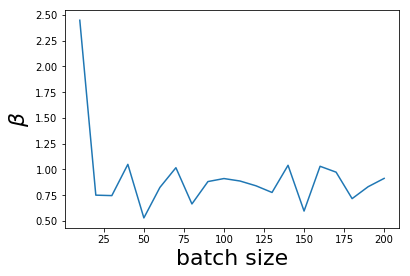

In [13]:
plt.plot([x*10+10 for x in range(len(para))],beta)
plt.xlabel('batch size',fontsize=22)
plt.ylabel(r'$\beta$',fontsize=22)

Text(0, 0.5, '$\\alpha$')

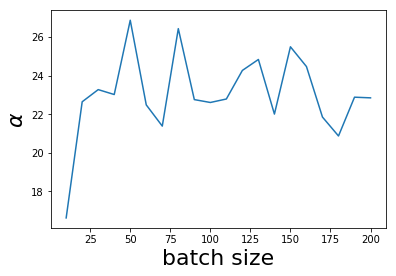

In [14]:
plt.plot([x*10+10 for x in range(len(alpha))],alpha)
plt.xlabel('batch size',fontsize=22)
plt.ylabel(r'$\alpha$',fontsize=22)

Text(0, 0.5, 'function values')

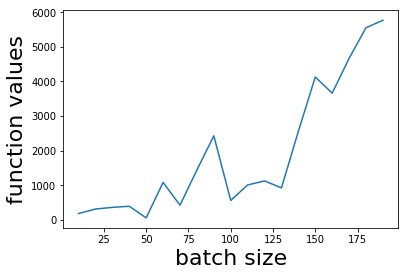

In [24]:
plt.plot([x*10+10 for x in range(len(stdev)-1)],stdev[:-1])   # drop the last item of zero b/c only one data
plt.xlabel('batch size',fontsize=22)
plt.ylabel('function values',fontsize=22)